In [682]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
alldata = pd.read_csv("BIOGRID-ALL-4.4.209.tab3.txt",sep ="\t")

/Users/jinglunli/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
br_asso_genes = pd.read_csv("breast cancer-associated-genes.tsv",sep ="\t")

In [26]:
br_list = list(br_asso_genes['symbol'])

In [120]:
human_filtered = alldata[(alldata["Organism Name Interactor A"] == "Homo sapiens") & (alldata["Organism Name Interactor B"] == "Homo sapiens")]

human_filtered = human_filtered.reset_index()

In [122]:
human_filtered_noself = human_filtered[human_filtered["Official Symbol Interactor A"] != human_filtered["Official Symbol Interactor B"]]
human_filtered_noself = human_filtered_noself.reset_index()

973721

In [188]:
### GDE genes 

In [212]:
GDE = pd.read_csv("GDE_Gene_Symbol.csv",sep =",")

GDE_TOP1000 = GDE.head(1000).dropna()   ### remove rows without gene symbol 
GDE_TOP1000 = GDE_TOP1000.drop_duplicates(subset='Gene_Symbol', keep='first')

GDE_TOP1000_genes = list(GDE_TOP1000['Gene_Symbol'])

### Top 1000 genes reported in opentargets
GDE_TOP1000_brassociated = GDE_TOP1000.loc[GDE_TOP1000['Gene_Symbol'].isin(br_list)]

In [362]:
GDE

,Unnamed: 0,Gene_Symbol,Log2FoldChange,pvalue
0,0,FRG1BP,-3.895427,1.976371e-172
1,1,ANKRD20A3P,-3.142684,4.389347e-131
2,2,LEP,-5.703383,7.752915e-129
3,3,SH3GL3,-3.256370,1.131555e-126
4,4,CD300LG,-4.417230,1.166193e-125
...,...,...,...,...
54670,54670,DGCR5,0.000058,9.996523e-01
54671,54671,PLEKHM1,-0.000050,9.997570e-01
54672,54672,AFF3,0.000046,9.998126e-01
54673,54673,DUSP18,-0.000015,9.998464e-01


In [ ]:
upregulated_nodes = []   ### 584
downregulated_nodes = [] ## 69
for i in edges_gde:
    for j in i:
        if float(GDE_TOP1000[GDE_TOP1000['Gene_Symbol'] == j]['Log2FoldChange']) >0:      
            if j not in upregulated_nodes:
                upregulated_nodes.append(j)
        if float(GDE_TOP1000[GDE_TOP1000['Gene_Symbol'] == j]['Log2FoldChange']) <0:
            if j not in downregulated_nodes:
                downregulated_nodes.append(j)

In [729]:
###  GDE genes with pvalue < 1e-20
GDE_TOP_pval = GDE[GDE['pvalue'] <= 1e-20] 
GDE_TOP_pval = GDE_TOP_pval.dropna().drop_duplicates(subset='Gene_Symbol', keep='first')
GDE_TOP_pval_genes = list(GDE_TOP_pval['Gene_Symbol'])


In [733]:
len(GDE_TOP_pval_genes)

1126

In [731]:
### edges between GDE_TOPpvalue_genes in alldata (physical and )


edges_gde_TOP_pval = []
for i in range(len(human_filtered_noself["Official Symbol Interactor A"])):
    if ((human_filtered_noself["Official Symbol Interactor A"][i] in GDE_TOP_pval_genes) & (human_filtered_noself["Official Symbol Interactor B"][i] in GDE_TOP_pval_genes)):
        ed = (human_filtered_noself["Official Symbol Interactor A"][i], human_filtered_noself["Official Symbol Interactor B"][i])
        ed2 = (human_filtered_noself["Official Symbol Interactor B"][i], human_filtered_noself["Official Symbol Interactor A"][i])
        if (ed not in edges_gde_TOP_pval) & (ed2 not in edges_gde_TOP_pval):
            edges_gde_TOP_pval.append(ed)
        

In [732]:
len(edges_gde_TOP_pval)

12378

In [734]:
upregulated_nodes_TOP_pval = []   
downregulated_nodes_TOP_pval = [] 
for i in edges_gde_TOP_pval:
    for j in i:
        if float(GDE_TOP_pval[GDE_TOP_pval['Gene_Symbol'] == j]['Log2FoldChange']) >0:      
            if j not in upregulated_nodes_TOP_pval:
                upregulated_nodes_TOP_pval.append(j)
        if float(GDE_TOP_pval[GDE_TOP_pval['Gene_Symbol'] == j]['Log2FoldChange']) <0:
            if j not in downregulated_nodes_TOP_pval:
                downregulated_nodes_TOP_pval.append(j)
        

In [735]:
len(upregulated_nodes_TOP_pval)

899

In [736]:
len(downregulated_nodes_TOP_pval)

98

In [672]:
G_regulated = nx.Graph()
G_regulated.add_nodes_from(upregulated_nodes_TOP_pval)
G_regulated.add_nodes_from(downregulated_nodes_TOP_pval)
G_regulated.add_edges_from(list(edges_gde))

In [687]:
len(G_regulated)

997

In [692]:
giant = max(nx.connected_components(G_regulated), key=len)
G_regulated_main = G_regulated.subgraph(giant)

color_map=[]
for node in G_regulated_main:
    if node in list(upregulated_nodes_TOP_pval):
        color_map.append("red")
    else:
        color_map.append("blue")

degree_rank = list(sorted(G_regulated_main.degree, key=lambda x: x[1], reverse=True))

degree_rank_hubs = dict(degree_rank[0:100])

degree_rank_hubs


{'KRAS': 388,
 'ELAVL1': 318,
 'RIT1': 191,
 'CAPZB': 173,
 'XPO1': 165,
 'STAU1': 160,
 'CDC42': 151,
 'VCP': 148,
 'FN1': 147,
 'PRC1': 145,
 'CANX': 141,
 'CDC5L': 141,
 'ANLN': 139,
 'HSPA8': 137,
 'CAND1': 137,
 'RHOA': 136,
 'HSPA5': 126,
 'ECT2': 125,
 'EZH2': 122,
 'RC3H2': 120,
 'FUS': 119,
 'RAC1': 118,
 'LRRC59': 116,
 'HSP90AA1': 113,
 'RAB7A': 111,
 'RPN1': 110,
 'HNRNPU': 108,
 'SUMO2': 108,
 'YWHAE': 105,
 'TOP1': 101,
 'G3BP1': 99,
 'PARP1': 98,
 'ILF3': 97,
 'GSK3B': 95,
 'RAB5C': 94,
 'ACTB': 93,
 'CSNK2A1': 89,
 'DHX9': 87,
 'RAB5A': 86,
 'HSPA1A': 85,
 'USP14': 85,
 'YWHAQ': 83,
 'RBX1': 83,
 'HSP90AB1': 82,
 'YWHAZ': 82,
 'RPN2': 82,
 'RAB2A': 82,
 'DERL1': 82,
 'HNRNPC': 80,
 'PCBP1': 80,
 'HNRNPA2B1': 79,
 'HSPD1': 78,
 'RAB1A': 77,
 'TUBB': 77,
 'EEF1A1': 77,
 'HNRNPK': 76,
 'CUL2': 76,
 'SRSF1': 75,
 'PPP1CA': 75,
 'RAB11A': 75,
 'SERBP1': 75,
 'MATR3': 74,
 'UBE2I': 74,
 'CDC73': 74,
 'SSR1': 74,
 'IQGAP1': 73,
 'SYNCRIP': 73,
 'CPSF6': 72,
 'VDAC1': 72,
 'HSP

In [709]:
labels = {}

for node in G_regulated_main.nodes():
    if node in degree_rank_hubs.keys():
        labels[node] = node
    



edgecolors = {}
for node in G_regulated_main.nodes():
    edgecolors[node] = "none"
    if node in list(GDE_TOP_pval_brassociated['Gene_Symbol']):
        edgecolors[node] = "yellow"
edgecolors_list = list(edgecolors.values())

pos=nx.kamada_kawai_layout(G_regulated_main)

In [725]:
node_size = {}
for node in G_regulated_main.nodes():
    node_size[node] = 50
    if node in degree_rank_hubs.keys():
        node_size[node] = 250
node_size_list = list(node_size.values())

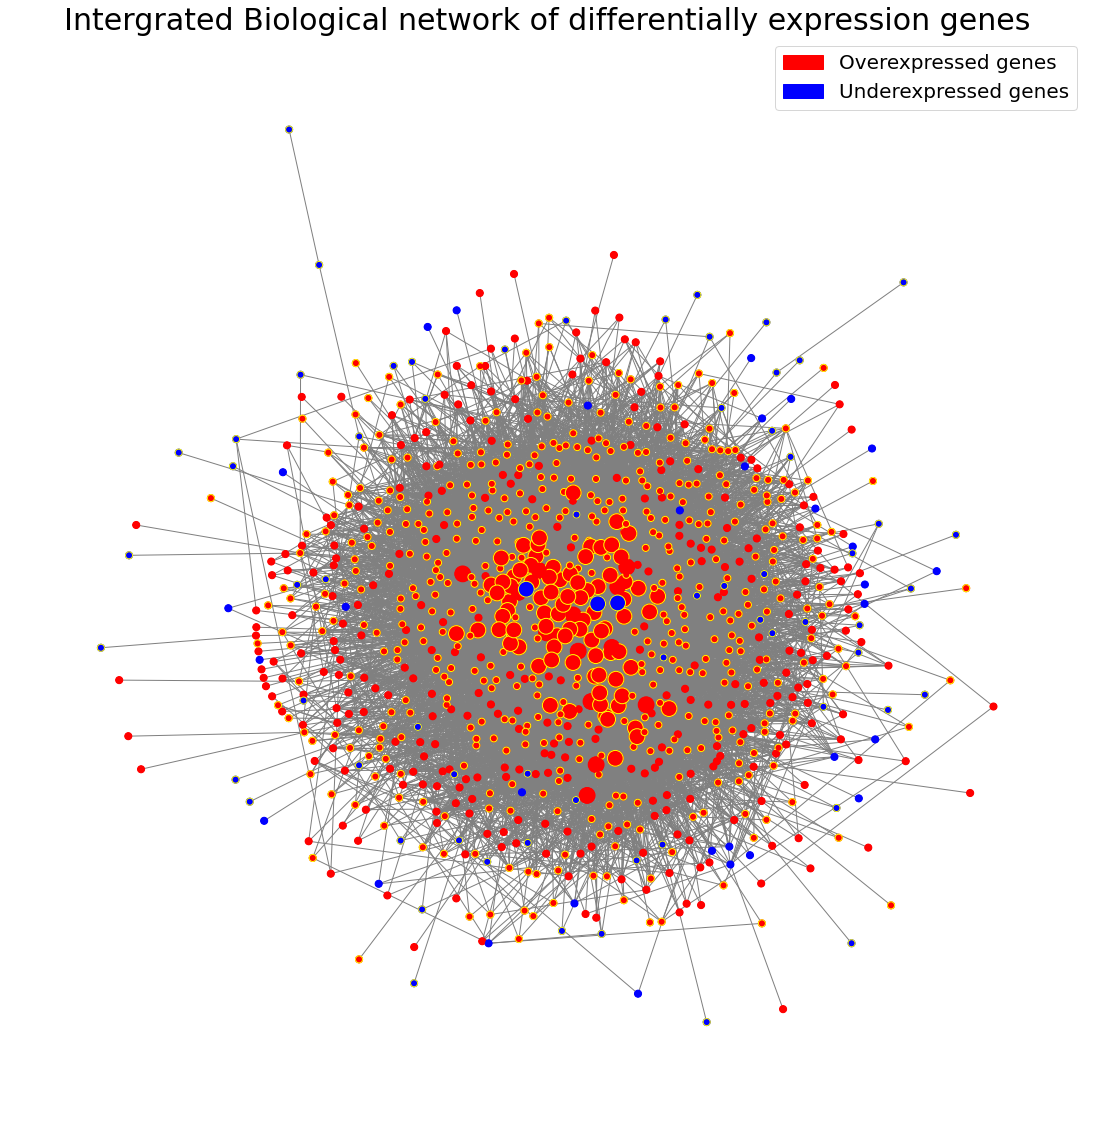

In [738]:
plt.figure(3,figsize=(15,15)) 
nx.draw(G_regulated_main,pos,node_color=color_map,node_size = node_size_list,with_labels=False, edge_color="gray")
nx.draw_networkx_nodes(G_regulated_main, pos,node_color=color_map,node_size = node_size_list, edgecolors = edgecolors_list )
#nx.draw_networkx_labels(G_regulated_main, pos, labels,font_size=13, font_color="k")
#plt.figtext(.02, .02, "The yellow circle of nodes indicate reported breast cancer association", fontsize = 20)
plt.title('Intergrated Biological network of differentially expression genes', fontsize = 30)
  # Creating legend with color box
red_patch = mpatches.Patch(color='red', label='Overexpressed genes')
blue_patch = mpatches.Patch(color='blue', label="Underexpressed genes")


plt.legend(handles=[red_patch,blue_patch],fontsize = 20)
plt.show()

In [699]:
l = 0
brc = 0
for i in GDE_TOP_pval_genes:
    if i not in G_regulated_main.nodes():
        l +=1
        if i in br_list:
            brc +=1
brc/l

0.3798449612403101

In [700]:
l = 0
brc = 0
for i in GDE_TOP_pval_genes:
    if i in G_regulated_main.nodes():
        l +=1
        if i in br_list:
            brc +=1
brc/l

0.6349047141424273

In [703]:
count = 0
for i in degree_rank_hubs.keys():
    if i in upregulated_nodes_TOP_pval:
        count +=1
count/len(degree_rank_hubs.keys())    

0.97

In [708]:
count = 0
l=0
for i in GDE_TOP_pval_genes:
    if i not in degree_rank_hubs.keys():
        l +=1
        if i in upregulated_nodes_TOP_pval:
            count +=1
count/l  

0.7816764132553606

In [696]:
count = 0
for i in 
for i in degree_rank_hubs.keys():
    if i in upregulated_nodes_TOP_pval:
        count +=1
count       

97

In [697]:
count = 0
for i in degree_rank_hubs.keys():
    if i in downregulated_nodes_TOP_pval:
        count +=1
count      

3

In [698]:
count = 0
for i in degree_rank_hubs.keys():
    if i in br_list:
        count +=1
count      

87

In [737]:
df = pd.DataFrame(data=(G_regulated_main.edges()))
df.to_csv("./DE_edges.csv", sep=',',index=False)